# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Hernandez, Red Christian\
_Student No._: 2022-03646\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 19/10/2024 @ 3:45 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: \
Red Christian Hernandez**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**30/30**</font>
* Problem 2 - <font color='red'>**70/70**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


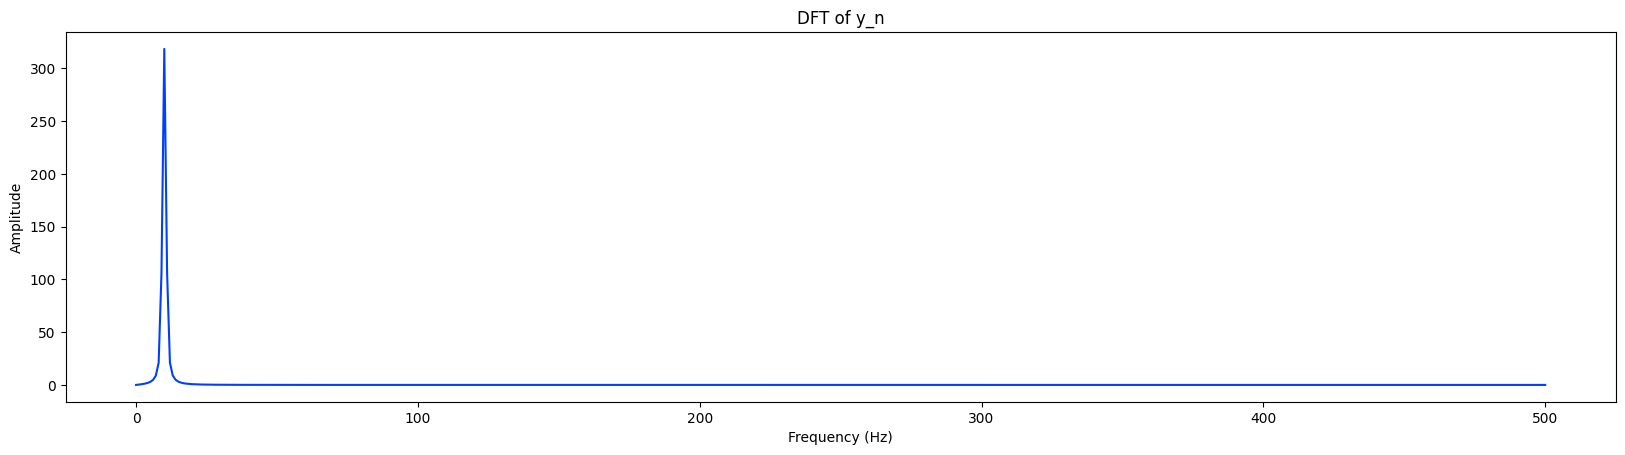

In [ ]:
# Problem 1
import numpy as np
import matplotlib.pyplot as plt
import cmath

# this function defines the Discrete Fourier Transform given a signal (y)
def dft(y):
    N = len(y) # N gets the length of the given signal y
    c = np.zeros(N//2+1, complex)  # we set an array for the DFT coefficients calculated only with elements N//2+1
                                   # due to the symmetric nature of real-valued signals
    for k in range(N//2+1): # we initiate a for loop that loops over k (frequency)
        for n in range(N): # we also initiate a iterative loop over n (time samples)
                           # we get the contribute of y[n] to the k index per iteration in a particular time domain
            c[k] += y[n] * cmath.exp(-2j * cmath.pi * k * n / N) # we use the dft formula in order to solve for the coefficients of a given frequency
    return c # we retrive the array of coefficients

# parameters
N = 1000  # number of samples in the given signal
T = 1   # period (duration of the signal in seconds)
sampling_rate = N / T  # sampling rate (in Hz)

n = np.arange(N) # array of time sample
t = n / sampling_rate  # time array based on sampling rate

# Define the signal y_n
y_n = np.sin(np.pi * t) * np.sin(20 * np.pi * t) # we define the function given in the problem
                                                 # i would to highlight that np.pi*t is also equal to
                                                 # np.pi*n*/(N/T) where N/T = 1000/1 = 1
                                                 # thus equating to the same function np.pi*n/N sampled at N = 1000

# Compute DFT
c_n = dft(y_n) # we now use DFT on our defined function to compute for its coefficients

# Manually compute the frequency array
frequencies = np.arange(N//2 + 1) * (sampling_rate / N) # the first element is defined as an array of elements 1000//2 +
                                                        # giving 501 elements, this is then multiplied by our computed sampling / 1000
                                                        # thus producing 501 elements (from 1 to 501) * (1000Hz/1000)
                                                        # therefore for each k represents a certain frequency k
                                                        # 1st element = 1 * 1Hz = 1Hz and so on...

# Plot the result
plt.style.use('seaborn-v0_8-bright') # we set style for plot
plt.figure().set_figwidth(20) # we set figure width
plt.plot(frequencies, np.abs(c_n)) # we define a plot with its frequencies set on the x axis and amplitude set on the y axis
                                   # defined as the absolute value of the DFT coefficients
plt.title('DFT of y_n') # title of plot
plt.xlabel('Frequency (Hz)') # x label as frequency
plt.ylabel('Amplitude') # y label as amplitude
plt.show() # we show the plot

Given that we have the function $y_{n} = sin(πn/N)sin(20πn/N)$ which has $sin(20πn/N)$ as its main frequency component producing about 10 oscillations over the length of the signal,  we could predict that the majority of the spiking frequency would come from about $10 Hz$ with an small modulating/enveloping effect coming from the first function $sin(πn/N)$ because of its lower frequency.

<font color=red>Correctness of Code: 15/15 </font> \
<font color=red>Discussion of Code and Results: 15/15 </font>

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive/Colab\ Notebooks

 AppPhysics155			      'Copy of Untitled0.ipynb'   Untitled0.ipynb
'Copy of Mathematical Synthax.ipynb'   Untitled			  Untitled1.ipynb


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/Colab Notebooks/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

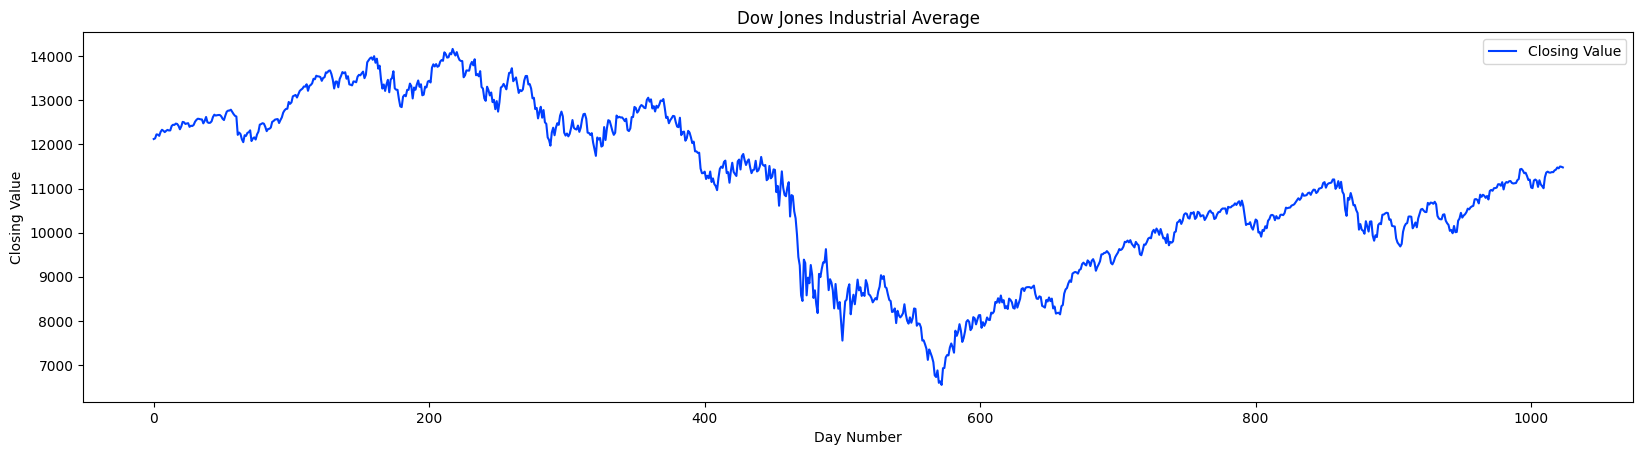

In [ ]:
## PROBLEM 2.1
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft, irfft

# we plot the given data from dow.txt
plt.style.use('seaborn-v0_8-bright') # we style the plot
plt.figure().set_figwidth(20) # width of figure adjusted for better clairty
plt.plot(dow) # we plot the given data from dow.txt
plt.title('Dow Jones Industrial Average') # title
plt.legend(['Closing Value']) # defined legend
plt.xlabel('Day Number') # x label
plt.ylabel('Closing Value') # y label
plt.show() # show plot

a slice of the coefficient showing complex value inputs: 
 [ 1235.3602819 +3588.91202613j   115.92045422-2380.85607299j
  -996.01443857+3471.03776298j -2178.83065443-2160.41927712j
  2142.93163569 +799.04091985j  -569.05985514-4313.39009379j
  1236.8542862 +4597.07424205j  1051.13154885 +969.21966508j
  3078.01962077 -627.30099118j -2244.87444517+1579.08039185j]
The humber of elements is 513


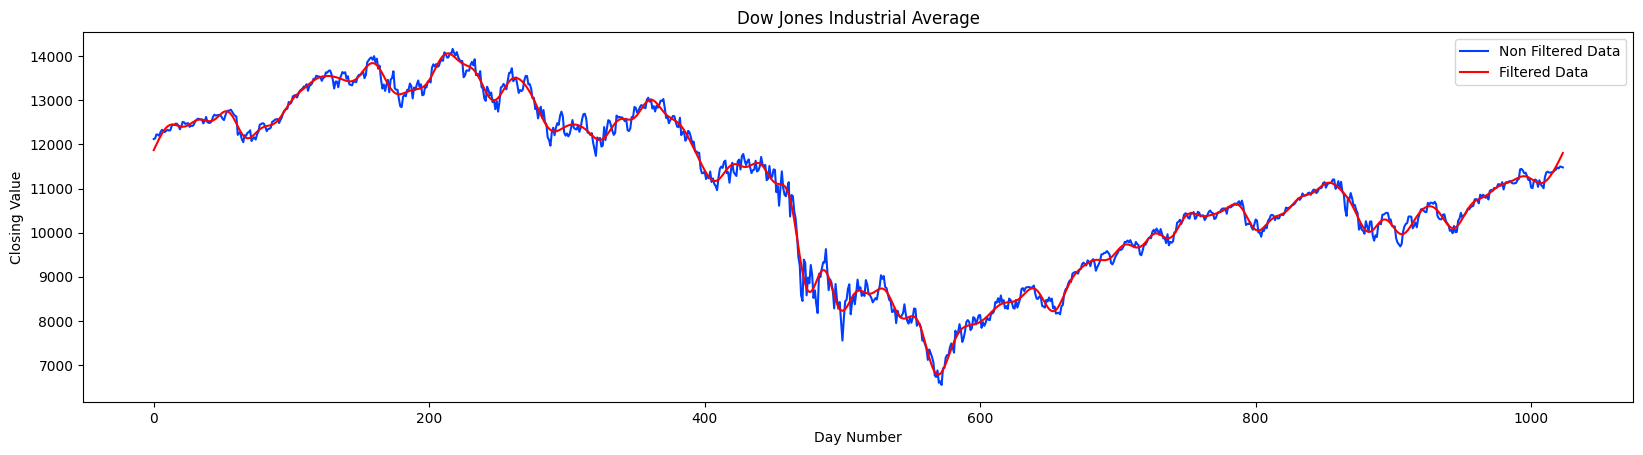

In [ ]:
## PROBLEM 2.2 - 2.4
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft, irfft

c_n = rfft(dow) # we perform rFFT fast fourier transform on real valued data on the given data dow.text

print(f'a slice of the coefficient showing complex value inputs: \n {c_n[300:310]}') # we show that the given a slice of the FFT coefficients from the given data we have complex values
print(f'The number of elements is {len(c_n)}') # we show that we have 513 complex valued coefficients gathered from the performed FFT

c_n1 = c_n[51:513] * 0 # we equal the later 90% of the quantities in the given data to zero and equate it into a separate array
c_n2 = c_n[0:round(0.1*len(c_n))] # we get the remaining 10% of the values in the given data and also equate into a separate array
c_n2 = np.hstack([c_n2, c_n1]) # we then combine these two arrays to build an with the same number of elements


ifftdow = irfft(c_n2) # we perform irfft inverse fast fourier transform on real valued data on our newly defined array

# we define the plot as
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure().set_figwidth(20) # figure width for better clarity
plt.plot(dow) # we make a plot given the original unfiltered data
plt.plot(ifftdow, color = 'red') # we make a new plot given the filtered data
plt.title('Dow Jones Industrial Average') # title
plt.legend(['Non Filtered Data', 'Filtered Data']) # legend
plt.xlabel('Day Number') # x label
plt.ylabel('Closing Value') # y label
plt.show() # show the plot

The FFT firstly recreates the given data in terms of sines and cosines of different frequencies providing fourier coefficients giving contribution of each frequency to the given data, with high frequency showing rapid changes and low frequencies showing long-term trends.

By setting the higher frequencies to zero we eliminate the high noise, rapidly changing frequencies and only leave the low frequency to show a smoother behaviour of the long term trend.

After filtering the higher frequencies of the data the we then put the filtered fourier coefficients into the Inverse FFT  in order to transform the frequency-domain signal into a smoothened time-domain signal showing less noise and a better view of the long term trends of the graph.


<font color=red>Correctness of Code: 35/35 </font> \
<font color=red>Discussion of Code and Results: 35/35 </font>